# Report

## Project Evolution

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set plotting style
sns.set(style="whitegrid")

In [4]:
df = pd.read_csv('simulation_report.csv')
display(df.head())

,generation,dot_id,food_eaten,highest_food,food_when_died,lifetime_steps,status,generation_created
0,2,0,-0.00,23.3,-0.00,1000,Dead,1
1,2,1,-0.02,5.0,-0.02,1000,Dead,1
2,2,2,-0.10,12.2,-0.10,1000,Dead,1
3,2,3,-0.10,5.0,-0.10,1000,Dead,1
4,2,4,-0.07,22.6,-0.07,1000,Dead,1


In [5]:
print("Summary statistics:")
display(df.describe())

Summary statistics:


,generation,dot_id,food_eaten,highest_food,food_when_died,lifetime_steps,generation_created
count,21916.000000,21916.000000,21916.000000,21916.000000,7403.000000,21916.000000,21916.000000
mean,35.108505,279.566892,24.793274,32.170908,-0.111051,17805.438949,17.303066
std,12.275289,197.721563,33.846791,49.358212,0.178132,12276.137595,12.245629
min,2.000000,0.000000,-0.990000,5.000000,-0.990000,1000.000000,1.000000
25%,26.000000,112.750000,-0.030000,7.320000,-0.090000,7000.000000,7.000000
50%,37.000000,246.000000,8.890000,17.740000,-0.060000,16000.000000,15.000000
75%,46.000000,419.000000,43.700000,48.200000,-0.030000,27000.000000,26.000000
max,52.000000,832.000000,839.770000,878.820000,-0.000000,51000.000000,51.000000


In [6]:
print("Missing values per column:")
display(df.isnull().sum())

Missing values per column:


generation                0
dot_id                    0
food_eaten                0
highest_food              0
food_when_died        14513
lifetime_steps            0
status                    0
generation_created        0
dtype: int64

In [8]:
df['food_eaten'] = pd.to_numeric(df['food_eaten'], errors='coerce')
df['highest_food'] = pd.to_numeric(df['highest_food'], errors='coerce')
df['lifetime_steps'] = pd.to_numeric(df['lifetime_steps'], errors='coerce')
df['food_when_died'] = pd.to_numeric(df['food_when_died'], errors='coerce')
df['is_alive'] = df['status'] == 'Alive'

1. Population to last generation

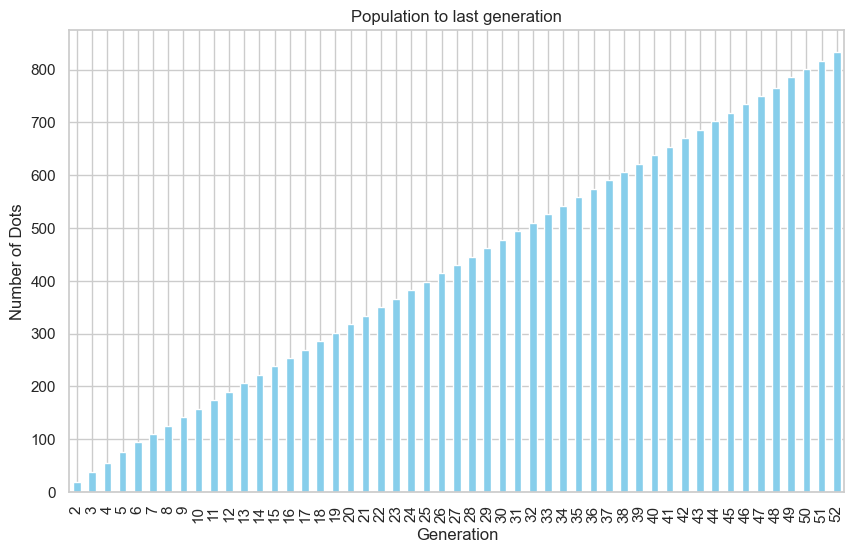

In [10]:
pop_per_gen = df.groupby('generation')['dot_id'].count()
plt.figure(figsize=(10, 6))
pop_per_gen.plot(kind='bar', color='skyblue')
plt.title('Population to last generation')
plt.xlabel('Generation')
plt.ylabel('Number of Dots')
plt.show()

2. Alive vs. Dead count per generation

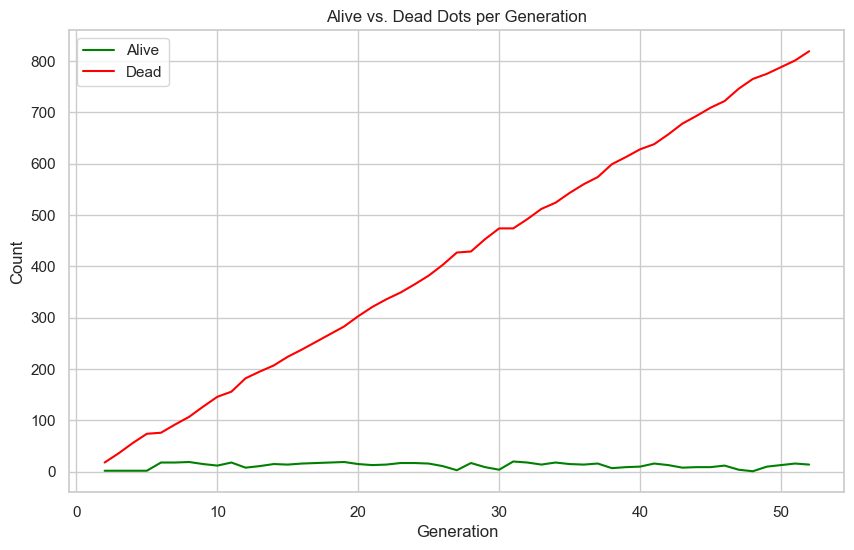

In [11]:
alive_count = df[df['is_alive']].groupby('generation')['dot_id'].count()
dead_count = df[~df['is_alive']].groupby('generation')['dot_id'].count()

fig, ax = plt.subplots(figsize=(10,6))
alive_count.plot(ax=ax, label='Alive', color='green')
dead_count.plot(ax=ax, label='Dead', color='red')
ax.set_title('Alive vs. Dead Dots per Generation')
ax.set_xlabel('Generation')
ax.set_ylabel('Count')
ax.legend()
plt.show()

3. Distribution of food eaten

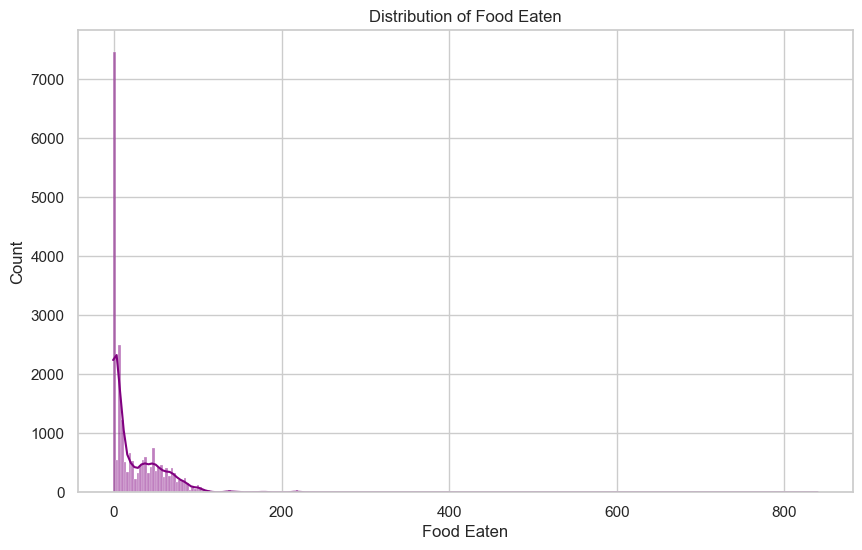

In [12]:
plt.figure(figsize=(10,6))
sns.histplot(df['food_eaten'], kde=True, color='purple')
plt.title('Distribution of Food Eaten')
plt.xlabel('Food Eaten')
plt.ylabel('Count')
plt.show()

4. Highest food level achieved per generation

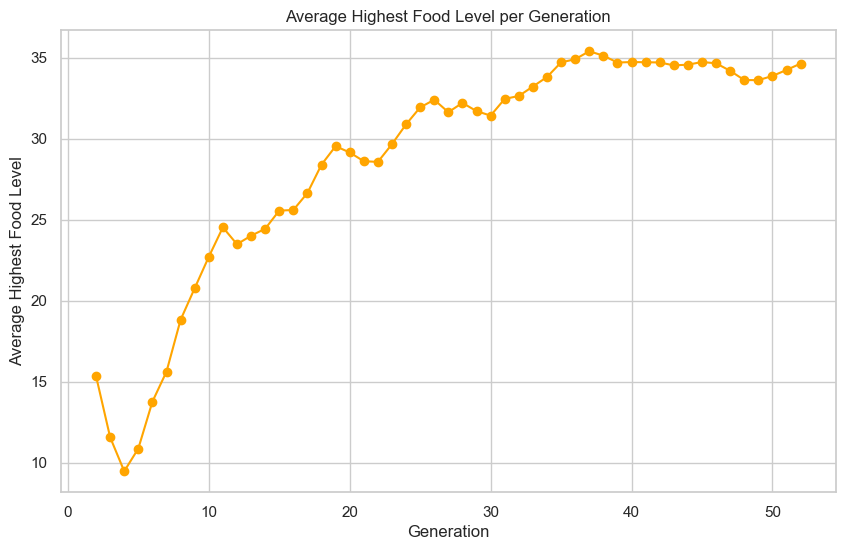

In [13]:
highest_food_mean = df.groupby('generation')['highest_food'].mean()
plt.figure(figsize=(10,6))
highest_food_mean.plot(marker='o', color='orange')
plt.title('Average Highest Food Level per Generation')
plt.xlabel('Generation')
plt.ylabel('Average Highest Food Level')
plt.show()

5. Lifetime steps distribution

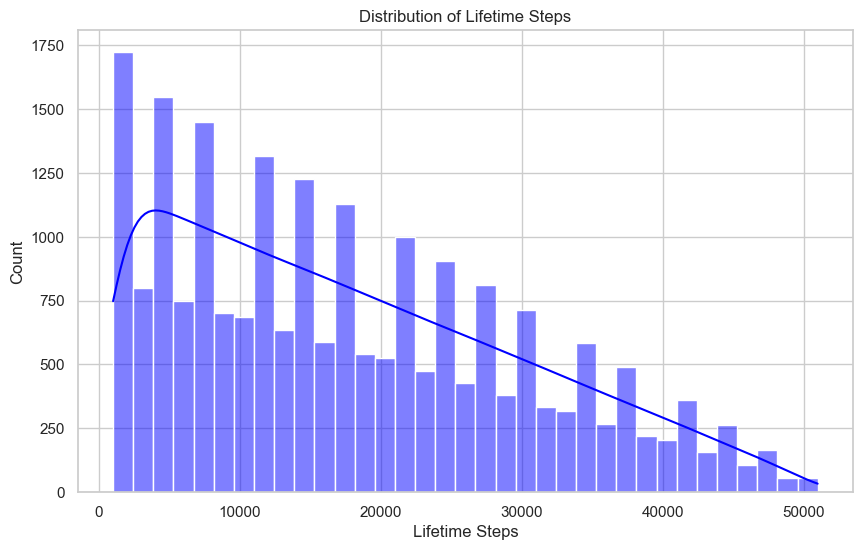

In [14]:
plt.figure(figsize=(10,6))
sns.histplot(df['lifetime_steps'], kde=True, color='blue')
plt.title('Distribution of Lifetime Steps')
plt.xlabel('Lifetime Steps')
plt.ylabel('Count')
plt.show()

6. Compare alive and dead dots in terms of food_eaten and highest_food

C:\Users\baran\AppData\Local\Temp\ipykernel_16900\1630030345.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='is_alive', y='food_eaten', ax=axes[0], palette='Set2')
C:\Users\baran\AppData\Local\Temp\ipykernel_16900\1630030345.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='is_alive', y='highest_food', ax=axes[1], palette='Set2')


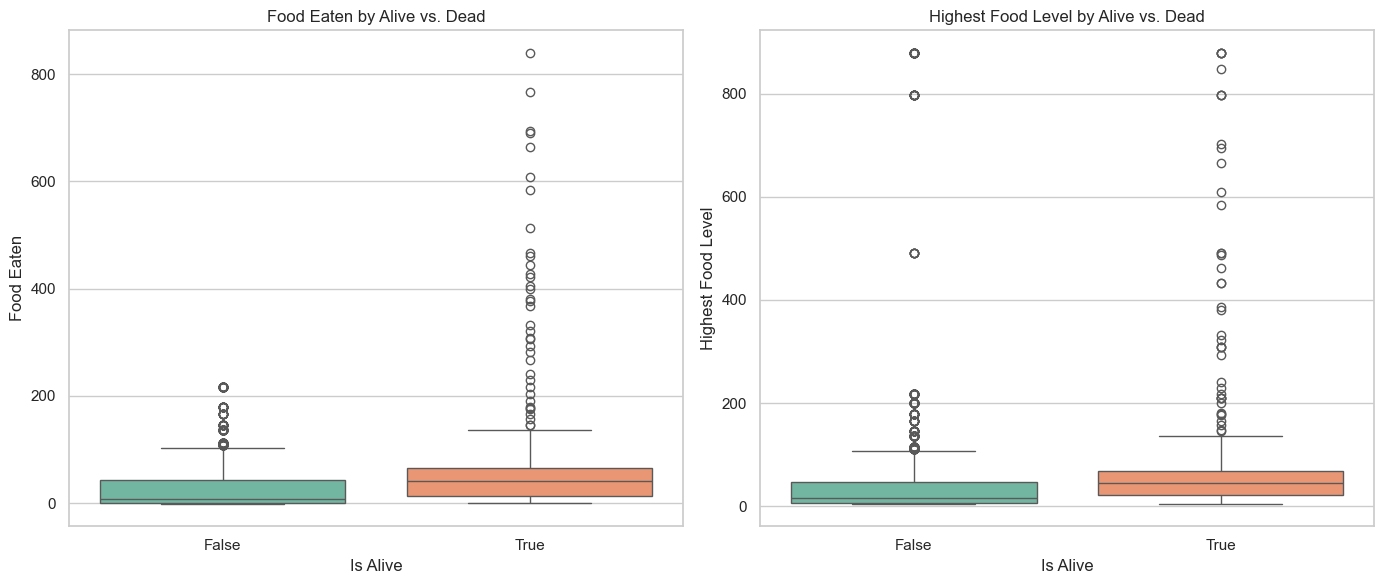

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(14,6))
sns.boxplot(data=df, x='is_alive', y='food_eaten', ax=axes[0], palette='Set2')
axes[0].set_title('Food Eaten by Alive vs. Dead')
axes[0].set_xlabel('Is Alive')
axes[0].set_ylabel('Food Eaten')

sns.boxplot(data=df, x='is_alive', y='highest_food', ax=axes[1], palette='Set2')
axes[1].set_title('Highest Food Level by Alive vs. Dead')
axes[1].set_xlabel('Is Alive')
axes[1].set_ylabel('Highest Food Level')

plt.tight_layout()
plt.show()

7. Population dynamics over generations

Tracking how the average food_eaten changes over generations

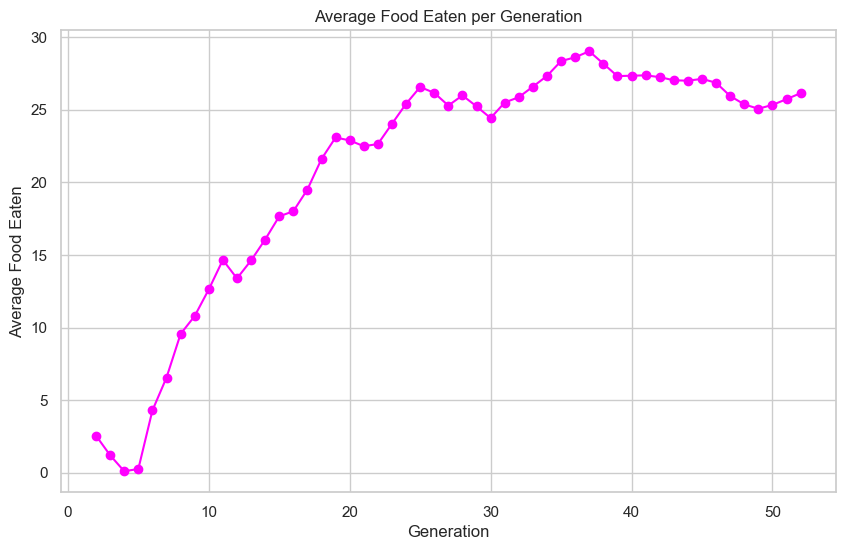

In [25]:
avg_food_eaten = df.groupby('generation')['food_eaten'].mean()
plt.figure(figsize=(10,6))
avg_food_eaten.plot(marker='o', color='magenta')
plt.title('Average Food Eaten per Generation')
plt.xlabel('Generation')
plt.ylabel('Average Food Eaten')
plt.show()

8. Survival analysis: how many dots remain alive per generation?

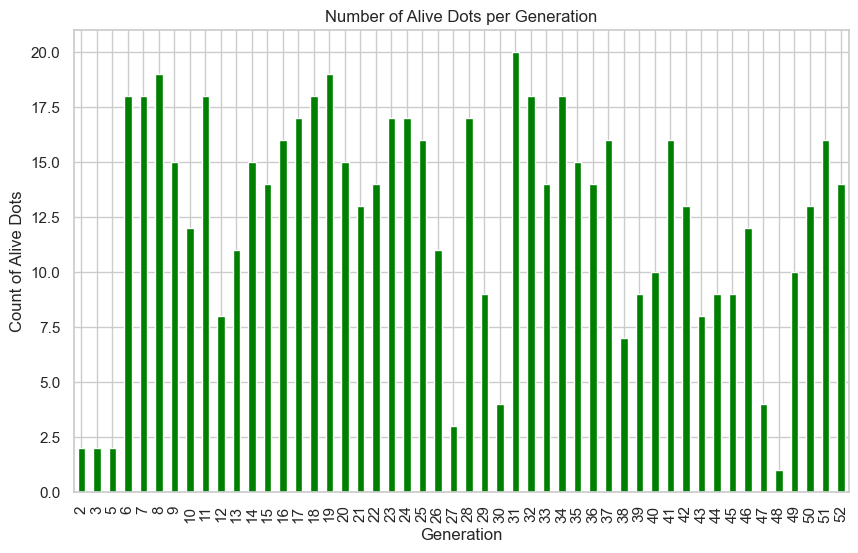

In [27]:
alive_per_gen = df[df['is_alive']].groupby('generation')['dot_id'].count()
plt.figure(figsize=(10,6))
alive_per_gen.plot(kind='bar', color='green')
plt.title('Number of Alive Dots per Generation')
plt.xlabel('Generation')
plt.ylabel('Count of Alive Dots')
plt.show()